# Chapter 2
## The Vector

### 2.2.1 Representation of vectors using Python dictionaries

In [1]:
# Sometimes we will use lists, but often dictionaries.

# sparse representation of word document (WORDS => int counts)
{'on': 1, 'Spain': 1, 'in': 1, 'plain': 1, 'the': 2, 'mainly': 1, 'rain': 1, 'falls': 1}

{'Spain': 1,
 'falls': 1,
 'in': 1,
 'mainly': 1,
 'on': 1,
 'plain': 1,
 'rain': 1,
 'the': 2}

**Task 2.3.2:** In this task, we will represent a vector using a Python list.  
In Python, assign to the variable `L` a list of 2-element lists:  


`>>> L = [[2, 2], [3, 2], [1.75, 1], [2, 1], [2.25, 1], [2.5, 1], [2.75, 1], [3, 1], [3.25, 1]]`

Plot these 2-vectors

In [42]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
matplotlib.rcParams['figure.figsize'] = (8, 8)

def plot_vectors_2d(vectors_2d, xlim=(0, 10), ylim=(0, 10)):
    plt.scatter([v[0] for v in vectors_2d], [v[1] for v in vectors_2d])
    plt.xlim(xlim)
    plt.ylim(ylim)

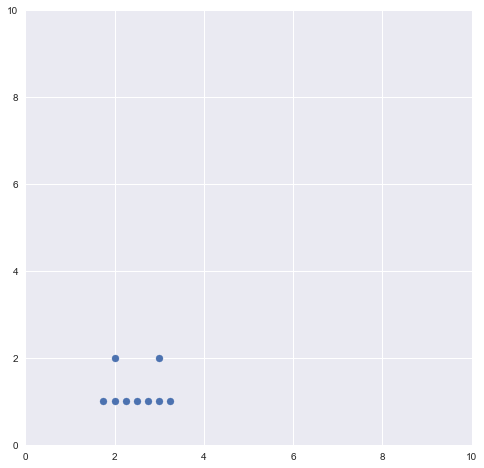

In [43]:
L = [[2, 2], [3, 2], [1.75, 1], [2, 1], [2.25, 1], [2.5, 1], [2.75, 1], [3, 1], [3.25, 1]]
plot_vectors_2d(L)

## 2.4 Vector addition

### 2.4.1 Translation and vector addition

**Task 2.4.3:** Recall the list `L` defined in Task 2.3.2. Enter the procedure definition for 2-vector addition, and use a comprehension to plot the points obtained from `L` by adding `[1, 2]` to each:  

`>>> plot([add2(v, [1, 2]) for v in L], 4)`

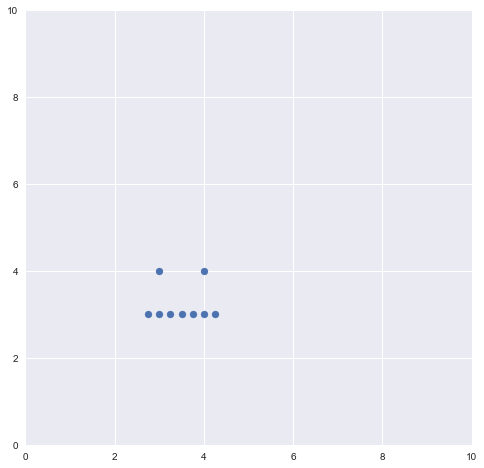

In [44]:
def add2(v, w):
    return [v[0] + w[0], v[1] + w[1]]

plot_vectors_2d([add2(v, [1, 2]) for v in L])

### 2.4.3 Vectors as arrows

**Exercise 2.4.6:** Draw a diagram representing the vector `[-2, 4]` using two different arrows.

In [45]:
def plot_arrows_2d(vec_2d, origins, **args):
    for origin in origins:
        plt.arrow(origin[0], origin[1], vec_2d[0], vec_2d[1], head_width = 0.5, **args)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

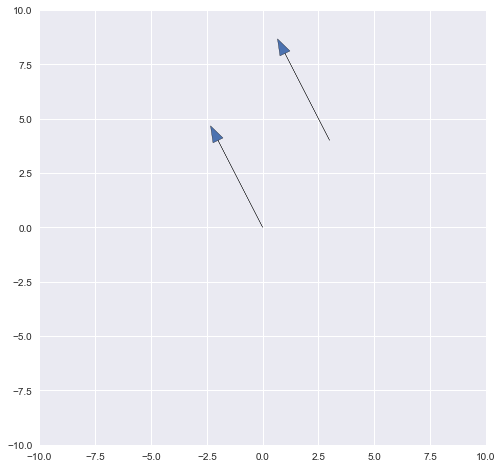

In [46]:
plot_arrows_2d([-2, 4], [[0, 0], [3, 4]])

**Exercise 2.4.7:** Draw a diagram illustrating `[-2, 4] + [1, 2]`

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plot_addition(vec_2d_1, vec_2d_2):
    plt.arrow(0, 0, vec_2d_1[0], vec_2d_1[1], head_width=0.5, linewidth=2, length_includes_head=True)
    plt.arrow(vec_2d_1[0], vec_2d_1[1], vec_2d_2[0], vec_2d_2[1], head_width=0.5, linewidth=2, length_includes_head=True)
    sum_vec_2d = add2(vec_2d_1, vec_2d_2)
    plt.arrow(0, 0, sum_vec_2d[0], sum_vec_2d[1], head_width=0.5, linestyle=':', linewidth=2, length_includes_head=True)
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.show()

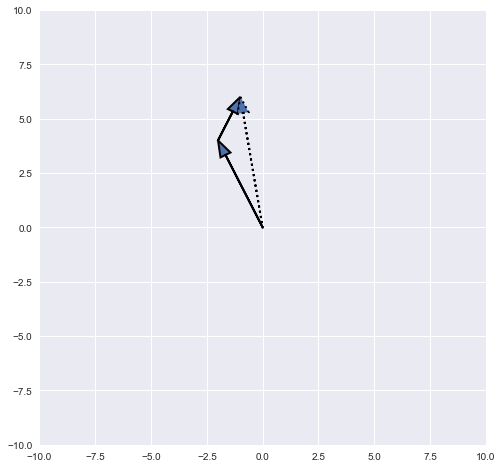

In [48]:
plot_addition([-2, 4], [1, 2])

## 2.5 Scalar-vector multiplication

**Task 2.5.4:** Plot the result of scaling the vectors in `L` by `0.5`, then plot the result of scaling them by `-0.5`.

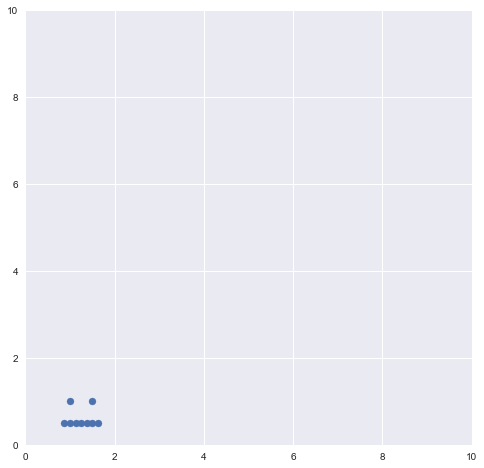

In [50]:
def scalar_vector_mult(vector, scalar):
    return [scalar * v for v in vector]

plot_vectors_2d([scalar_vector_mult(l, 0.5) for l in L])

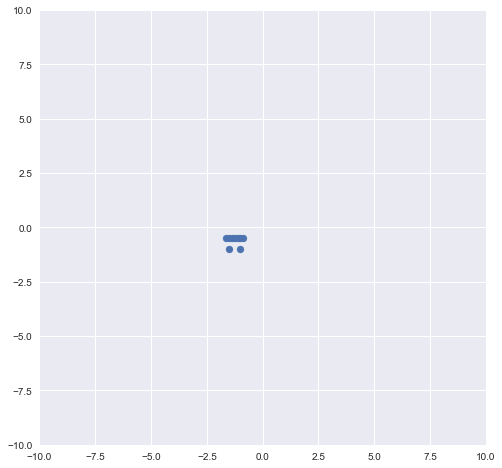

In [52]:
plot_vectors_2d([scalar_vector_mult(l, -0.5) for l in L], xlim=(-10, 10), ylim=(-10, 10))

### 2.5.1 Scaling arrows


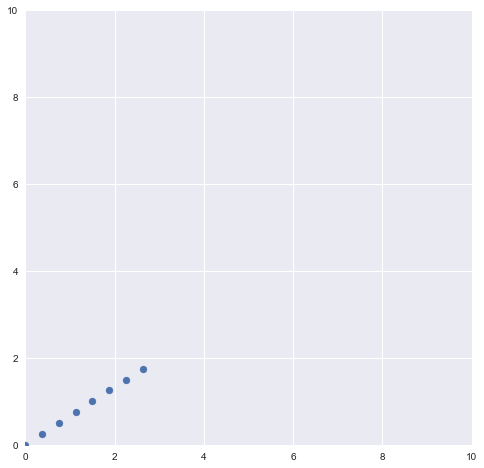

In [57]:
plot_vectors_2d([scalar_vector_mult([3, 2], i / 8) for i in range(8)])

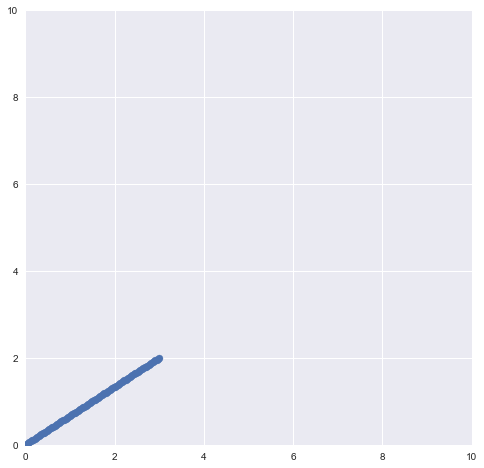

In [58]:
plot_vectors_2d([scalar_vector_mult([3, 2], i / 100) for i in range(101)])

The points of $\{\alpha v : \alpha \in \mathbb{R}\}$ form the infinite line through the origin and through $v$:

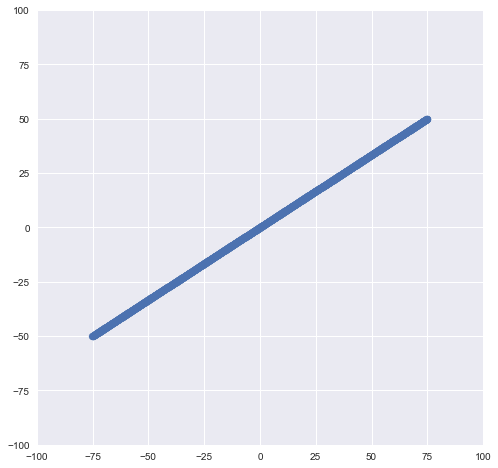

In [68]:
plot_vectors_2d([scalar_vector_mult([3, 2], i / 20) for i in range(-501, 501)], xlim=(-100, 100), ylim=(-100, 100))

**Review question:** _Express the line segment between the origin and another point through the oriigin as a set of scalar multiples of a single vector.

**Review question:** _Express a line through the origin as the set of scalar multiples of a single vector.